In [1]:
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
X, _ = make_blobs(n_samples=2000, n_features=2, centers = 5, random_state=100)

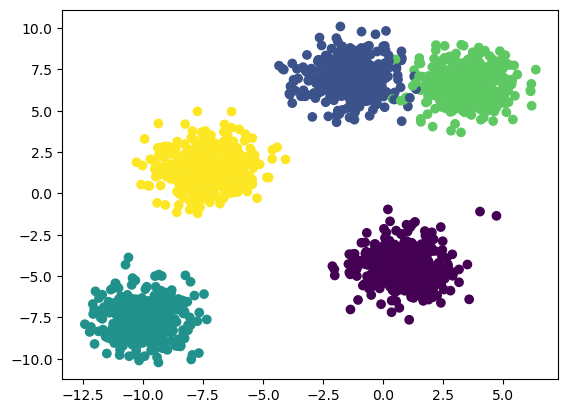

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = _)

# Here we initialize some random center point by our own 
because sometimes we don't know how many clusters are pefect for our dataset ,since this is only 2-d datasets so we can see 5 clusters.

In [5]:
cls = KMeans(n_clusters=3, max_iter=300, init='k-means++')

In [6]:
cls

KMeans(n_clusters=3)

In [8]:
cls.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

# 3 center points that we have created randomly

In [9]:
C = cls.cluster_centers_
C

array([[ 0.98268554,  6.73867084],
       [-8.61484627, -3.06593214],
       [ 0.87670966, -4.48303238]])

# Lets plot the dataset and these center points after training on our data

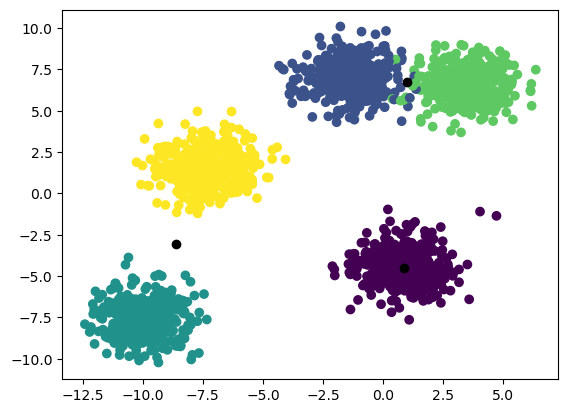

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = _)
plt.scatter(C[:, 0], C[:, 1], c = 'black')


# So here you can cleary see it's not the ideal condition to go with 3 center point for this dataset 

Now we need to find the perfect no. of clusters for this dataset and apply elbow method to find it.

# calculate the perfect number of clusters that can exist for this dataset

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=300, n_init=10, random_state=100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the WCSS and observe after which no. of clusters it is showing small change in WCSS 

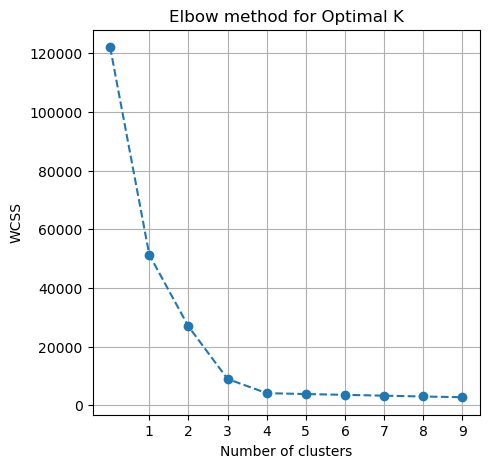

In [12]:
plt.figure(figsize = (5, 5))

plt.plot(wcss, marker = 'o', linestyle = '--')
plt.title('Elbow method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

# from this graph we can conclude that 5 clusters can be beneficial for us to proceed in the model

In [13]:
CLS = KMeans(n_clusters=5)

In [14]:
CLS

KMeans(n_clusters=5)

In [15]:
CLS.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [17]:
center_points = CLS.cluster_centers_
center_points

array([[ 3.4638994 ,  6.59325012],
       [-9.89764397, -7.58714437],
       [-7.29432212,  1.5170237 ],
       [ 0.87670966, -4.48303238],
       [-1.44027944,  6.92039398]])

In [18]:
center_points.shape

(5, 2)

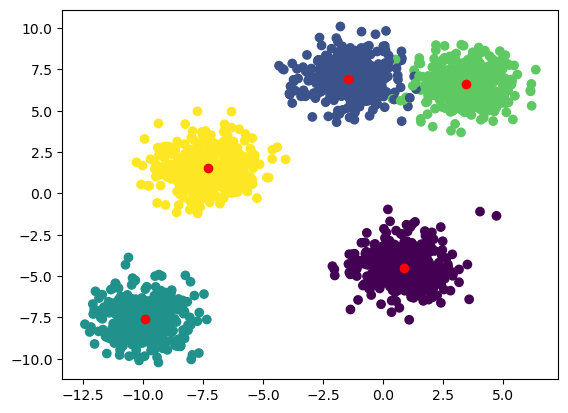

In [19]:
plt.scatter(X[:, 0], X[:, 1], c = _)
plt.scatter(center_points[:, 0], center_points[:, 1], c = 'red')


In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()

In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
x = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [28]:
x = x.values

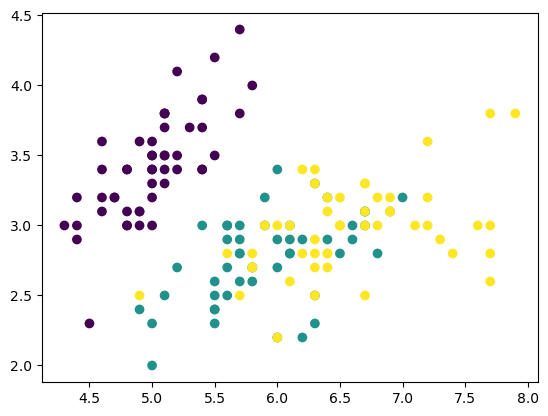

In [29]:
plt.scatter(x[:, 0], x[:, 1], c = y)

# we can cleary see there are 3 different clusters but still let's apply elbow method for confirmation

In [31]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=300, n_init=10, random_state=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

In [32]:
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.25600931571816,
 46.446182051282065,
 39.03998724608726,
 34.29971212121213,
 29.99042640692641,
 27.811546962762648,
 26.29817969165338]

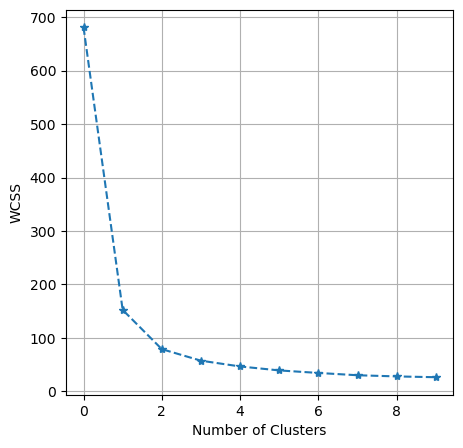

In [33]:
plt.figure(figsize = (5,5))
plt.plot(wcss, marker = '*', linestyle = '--')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# So from the above graph we can see 3 clusters are best for this dataset after that change in WCSS is small 

In [34]:
cls = KMeans(n_clusters=3, random_state=100)

In [35]:
cls.fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=100)

In [37]:
center = cls.cluster_centers_

In [38]:
center.shape

(3, 4)

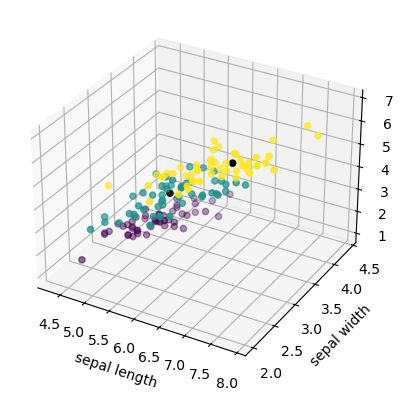

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(x[:, 0], x[:, 1],x[:, 2] ,c = y)
ax.scatter(center[:, 0], center[:, 1], center[:, 2], c = 'black')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.show()